In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline  

import seaborn as sns 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import scipy.stats as stats
import math 

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
#convert column name ['date'] from object to datetime 
df['sqft_basement'] = df['sqft_basement'].map(lambda x: 0 if x=='?' else x)

#Convert sqft_basement to a number
df['sqft_basement'] = df['sqft_basement'].astype(float)

#might be cool to create a function that takes any column date and converts it 

df['date'] = pd.to_datetime(df['date'])

df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [5]:
#replacing all ? with 0's - major assumption that requires data enrichment to correct
#

df['sqft_basement'] = df['sqft_basement'].map(lambda x: 0 if x==
                                             '?' else x)

df['sqft_basement'] = df['sqft_basement'].astype(float)

df['sqft_basement'].describe()

count    21597.000000
mean       285.716581
std        439.819830
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [6]:
# Identify null values 

df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
#Repeat the same process for view which indicates how many times a house has been viewed

#We replaced all views with a median value, its safe to assume houses on the market in these areas are quite popular and viewed 
median = df['view'].median()
df['view'] = df['view'].fillna(value=median)#Waterfront 0 = No waterfront, 1=Waterfront 

#Making all nulls 0 indicating no waterfront 

df['waterfront'].isna().sum()

df['waterfront'] = df['waterfront'].fillna(0)


df['yr_renovated'] = df['yr_renovated'].fillna(df['yr_built'])

In [8]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
#dropped all duplicates for id 
#inplace = True changes the dataframe permanently

df.drop_duplicates(subset=['id'], inplace=True)

In [10]:
#drop id column
df.drop(['id'], axis=1, inplace=True)

In [11]:
df.shape

(21420, 20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029CC1CA2DC8>,
      dtype=object)

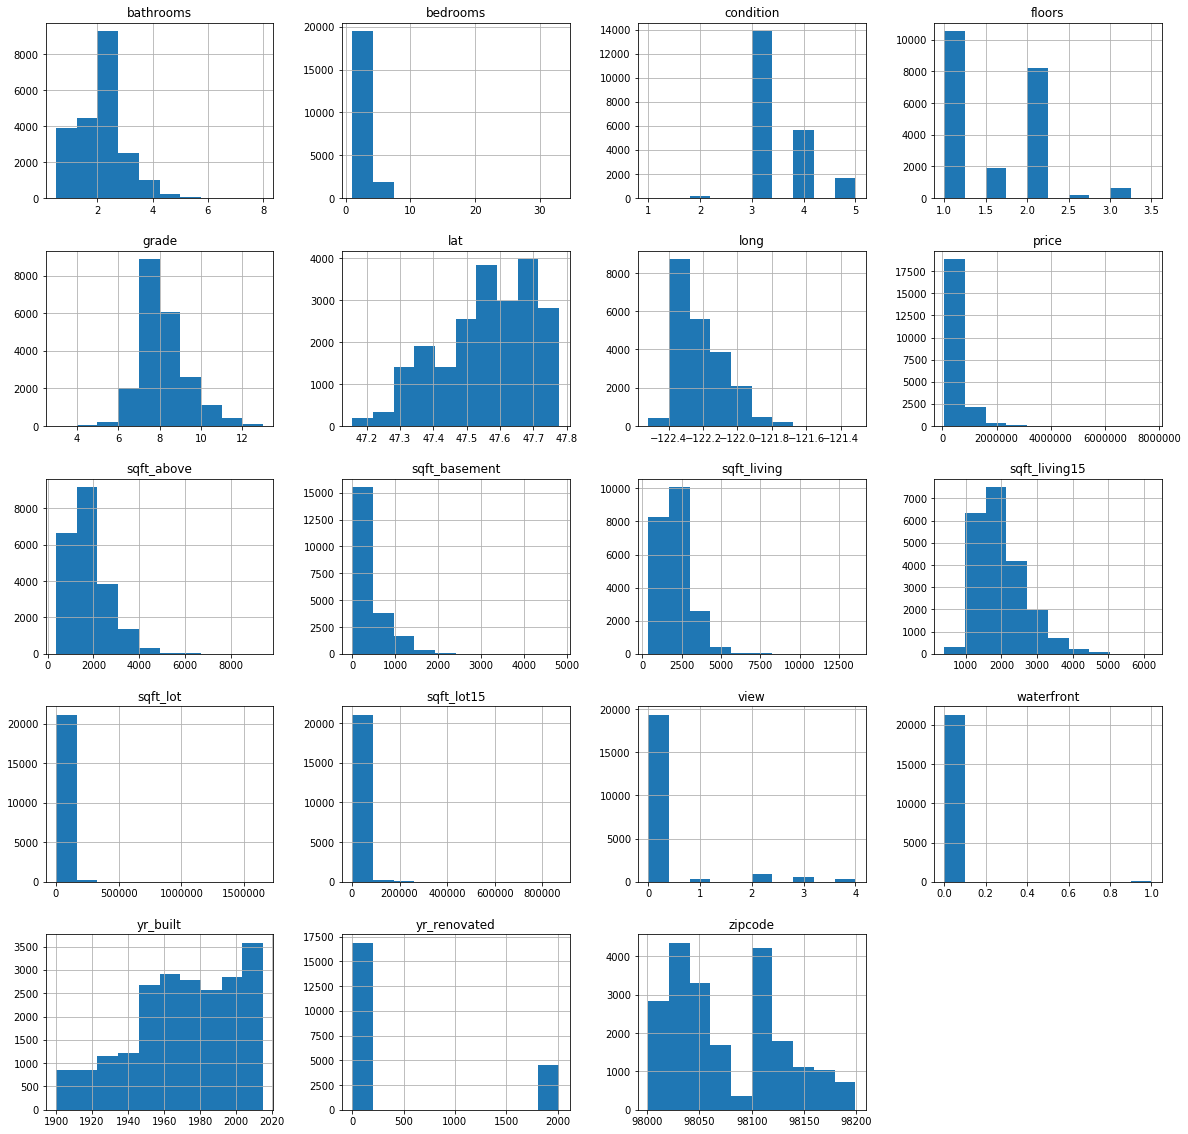

In [12]:
df.hist(figsize=(20,20))

In [13]:
#sqft_living 

indexNames = df[df['sqft_living'] >= 5000 ].index
df.drop(indexNames , inplace=True)

# sqft_above 

indexNames = df[df['sqft_above'] >= 4500 ].index
df.drop(indexNames , inplace=True)

#sqft_basement 

indexNames = df[df['sqft_basement'] >= 2000 ].index
df.drop(indexNames , inplace=True)

# dropping sqft_lot outliers

indexNames = df[df['sqft_lot'] >= 100000 ].index
df.drop(indexNames , inplace=True)

# dropping sqft_living15 outliers

indexNames = df[df['sqft_living15'] >= 4500 ].index
df.drop(indexNames , inplace=True)

# dropping sqft_lot15 outliers

indexNames = df[df['sqft_lot15'] >= 100000 ].index
df.drop(indexNames , inplace=True)


# dropping grade outliers
indexNames = df[df['grade'] == 3 ].index
df.drop(indexNames , inplace=True)

indexNames = df[df['grade'] == 13 ].index
df.drop(indexNames , inplace=True)

# dropping bedroom outliers over 8 rooms
indexNames = df[df['bedrooms'] >= 8 ].index
df.drop(indexNames , inplace=True)

#drop houses over a million
indexNames = df[df['price'] >= 1000000].index
df.drop(indexNames, inplace=True)

In [14]:
corr = df.corr()

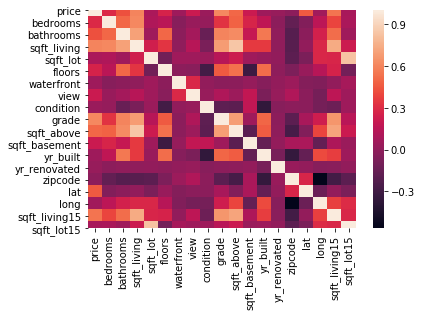

In [15]:
sns.heatmap(corr)

In [16]:
# OLS Regression

#It didnt seem to work!

import statsmodels.api as sm
import statsmodels.formula.api as smf

col_names = df.describe().columns #What does this?

results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p_value ']] #creating an array of results we care about

for idx, val in enumerate(col_names):
    print('price~' + val)
    f = 'price~' + val
    model = smf.ols(formula=f, data=df).fit()
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    results.append({val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]})

    print(results[idx+1])
    print(model.summary())

price~price
{-1.546140993013978e-10, 1.0, 'price', 1.0000000000000004, 0.0}
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.040e+34
Date:                Sat, 15 Feb 2020   Prob (F-statistic):               0.00
Time:                        21:05:32   Log-Likelihood:             4.1539e+05
No. Observations:               19394   AIC:                        -8.308e+05
Df Residuals:                   19392   BIC:                        -8.308e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

{0.0466952862538883, 1.1323642050374711e-203, 453590.33183655166, 'view', 69753.06868291706}
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     949.9
Date:                Sat, 15 Feb 2020   Prob (F-statistic):          1.13e-203
Time:                        21:05:32   Log-Likelihood:            -2.6325e+05
No. Observations:               19394   AIC:                         5.265e+05
Df Residuals:                   19392   BIC:                         5.265e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

{0.0008117105863482132, 7.241500666896435e-05, 6.919416992107156, 'yr_renovated', 461502.81747618655}
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     15.75
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           7.24e-05
Time:                        21:05:32   Log-Likelihood:            -2.6371e+05
No. Observations:               19394   AIC:                         5.274e+05
Df Residuals:                   19392   BIC:                         5.274e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

# Numerical Only Regresision

In [17]:
# Numerical Only Regression

df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000
mean,464344.259616,3.314169,2.030435,1934.837011,9811.660204,1.471821,0.002372,0.154171,3.407703,7.493658,1674.932608,254.289058,1970.633650,410.647623,98079.377179,47.558005,-122.217229,1897.099722,9213.057286
std,194611.680215,0.865549,0.692493,728.711322,10606.555760,0.538104,0.048645,0.602896,0.645053,0.995263,692.668128,393.426251,29.213787,801.308969,53.519492,0.140594,0.139285,594.008619,9261.596249
min,78000.000000,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,4.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.512000,460.000000,651.000000
25%,311000.000000,3.000000,1.500000,1390.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1160.000000,0.000000,1951.000000,0.000000,98033.000000,47.462900,-122.331000,1460.000000,5000.000000
50%,430000.000000,3.000000,2.000000,1830.000000,7390.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1490.000000,0.000000,1974.000000,0.000000,98072.000000,47.567250,-122.240000,1780.000000,7475.000000
75%,589000.000000,4.000000,2.500000,2390.000000,9990.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2050.000000,500.000000,1996.000000,0.000000,98118.000000,47.680800,-122.129000,2240.000000,9638.750000
max,999999.000000,7.000000,5.750000,4940.000000,99916.000000,3.500000,1.000000,4.000000,5.000000,11.000000,4480.000000,1990.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,4495.000000,99316.000000


In [18]:
outcome  = 'price'

x_cols = [ 'bedrooms', 'bathrooms', 'sqft_living',
       'floors','sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']

In [19]:
from statsmodels.formula.api import ols

In [20]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     1744.
Date:                Sat, 15 Feb 2020   Prob (F-statistic):               0.00
Time:                        21:05:38   Log-Likelihood:            -2.5749e+05
No. Observations:               19394   AIC:                         5.150e+05
Df Residuals:                   19383   BIC:                         5.151e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.557e+06   8.84e+04     51.549      0.000    4.38e+06    4.73e+06
bedrooms      -2.741e+04   1522.939    -17.997      0.000   -3.04e+04   -2.44e+04
bathrooms       3.76e+04   2499.004     15.046      0.000    3.27e+04    4.25e+04
sqft_living     127.3819     14.416      8.836      0.000      99.125     155.639
floors         6.847e+04   2680.044     25.548      0.000    6.32e+04    7.37e+04
sqft_above      -21.1353     14.386     -1.469      0.142     -49.332       7.062
sqft_basement     5.8403     14.301      0.408      0.683     -22.191      33.872
yr_built      -2323.4421     46.081    -50.421      0.000   -2413.764   -2233.120
yr_renovated      1.2523      1.273      0.983      0.325      -1.244       3.748
sqft_living15   104.0305      2.708     38.411      0.000      98.722     109.339
sqft_lot15       -1.1895      0.118    -10.090      0.000      -1.421      -0.958
==============================================================================
Omnibus:                      360.699   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              382.167
Skew:                           0.332   Prob(JB):                     1.03e-83
Kurtosis:                       3.177   Cond. No.                     1.17e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Need to drop sqft_basement, sqft_above 

In [23]:
outcome  = 'price'

x_cols = [ 'bedrooms', 'bathrooms', 'sqft_living',
       'floors',
       'yr_built',
       'sqft_living15', 'sqft_lot15']

In [24]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     2475.
Date:                Sat, 15 Feb 2020   Prob (F-statistic):               0.00
Time:                        21:05:54   Log-Likelihood:            -2.5752e+05
No. Observations:               19394   AIC:                         5.151e+05
Df Residuals:                   19386   BIC:                         5.151e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.686e+06   8.67e+04     54.044      0.000    4.52e+06    4.86e+06
bedrooms      -2.769e+04   1524.264    -18.165      0.000   -3.07e+04   -2.47e+04
bathrooms      4.157e+04   2452.055     16.953      0.000    3.68e+04    4.64e+04
sqft_living     115.7584      2.757     41.991      0.000     110.355     121.162
floors         5.852e+04   2366.616     24.727      0.000    5.39e+04    6.32e+04
yr_built      -2385.1714     45.338    -52.608      0.000   -2474.039   -2296.304
sqft_living15    98.9288      2.635     37.540      0.000      93.763     104.094
sqft_lot15       -1.2850      0.117    -10.945      0.000      -1.515      -1.055
==============================================================================
Omnibus:                      344.419   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.240
Skew:                           0.327   Prob(JB):                     1.33e-79
Kurtosis:                       3.146   Cond. No.                     1.14e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# r^2 is quite low but we have controlled for p values

# However, kurtosis remainds high indicated normalization or log values might a good solution

# Evaluate our Numerical Only Model 

In [25]:
y  = df['price']

X = df[[ 'bedrooms', 'bathrooms', 'sqft_living',
       'floors',
       'yr_built', 
       'sqft_living15', 'sqft_lot15']]

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [28]:
# A brief preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

14545 4849 14545 4849


# Apply Model to train set 

In [29]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [30]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Calculate predictions on training and test sets

In [32]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

# Calculate training and test residuals 

In [33]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [34]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

# Calculate Mean Squared Error (MSE)
# A good way to compare overall performance is to compare the mean squarred error for the predicted values on the training and test sets.



In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 19862648543.51398
Test Mean Squarred Error: 20434655948.32967


In [37]:
import math
math.sqrt(test_mse)

142949.83717489737

In [38]:
math.sqrt(train_mse)

140934.90888886963

# Evaluate effect of train test split size

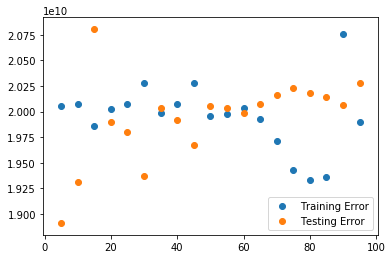

In [39]:
import random
random.seed(11)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

# Repeat the previous example, but for each train-test split size, generate 100 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data.

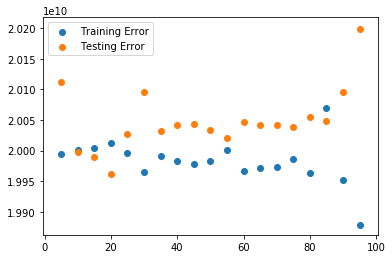

In [40]:
random.seed(8)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='neg_mean_squared_error'))

In [42]:
#Cross-Validation

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [44]:
# A brief preview of train-test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

15515 3879 15515 3879


In [45]:
linreg = LinearRegression()

linreg.fit(X_train, y_train)
y_hat_test = linreg.predict(X_test)

In [46]:
# Residuals and MSE 

In [47]:
test_residuals = y_hat_test - y_test

test_mse = mean_squared_error(y_test, y_hat_test)
test_mse

20262905189.499367

In [52]:
import math
math.sqrt(test_mse)

142347.83169932503

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error')

In [49]:
cv_5_results

array([-2.02503255e+10, -1.98719273e+10, -1.92544826e+10, -1.98926246e+10,
       -2.22230807e+10])